In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read the data from CSV file
df = pd.read_csv('performance_290323_rs99.csv')

# extract the unique values of 'WordEmbedding' and 'Model'
word_embeddings = df['WordEmbedding'].unique()
models = df['Model'].unique()

x = np.arange(len(models))
width = 0.2

#colors = ['#145DA0', '#0C2D48', '#2E8BC0', '#B1D4E0']
colors = ['#1984c5', '#a7d5ed', '#e1a692', '#c23728']

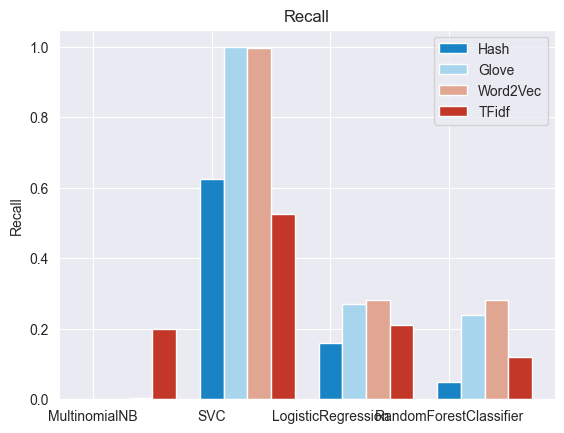

In [12]:
# create a dictionary to store the recall values
recall_dict = {we: {m: 0 for m in models} for we in word_embeddings}

# populate the recall values from the dataframe
for _, row in df.iterrows():
    recall_dict[row['WordEmbedding']][row['Model']] = row['Recall']

fig, ax = plt.subplots()

for i, we in enumerate(word_embeddings):
    recalls = [recall_dict[we][m] for m in models]
    ax.bar(x + i*width, recalls, width, label=we, color=colors[i])

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_title("Recall")
ax.set_ylabel("Recall")
ax.legend()
plt.show()

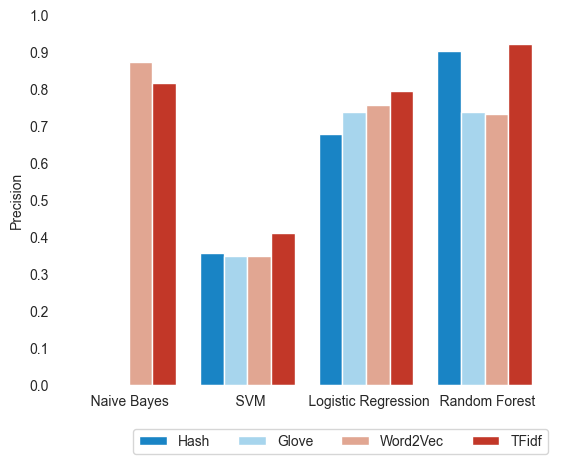

<Figure size 640x480 with 0 Axes>

In [45]:
# create a dictionary to store the precision values
precision_dict = {we: {m: 0 for m in models} for we in word_embeddings}
labels = ["Naive Bayes", "SVM", "Logistic Regression", "Random Forest"]

for _, row in df.iterrows():
    precision_dict[row['WordEmbedding']][row['Model']] = row['Precision']

fig, ax = plt.subplots()

for i, we in enumerate(word_embeddings):
    precisions = [precision_dict[we][m] for m in models]
    ax.bar(x + i*width, precisions, width, label=we, color=colors[i])

ax.set_xticks(x)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_xticklabels(labels, ha='center')
ax.set_facecolor("white")
ax.set_ylabel("Precision")
ax.legend(loc='upper right', bbox_to_anchor=(1.0, -0.1), ncol=4, facecolor="white")
plt.show()
plt.savefig('precision.png', transparent=True)

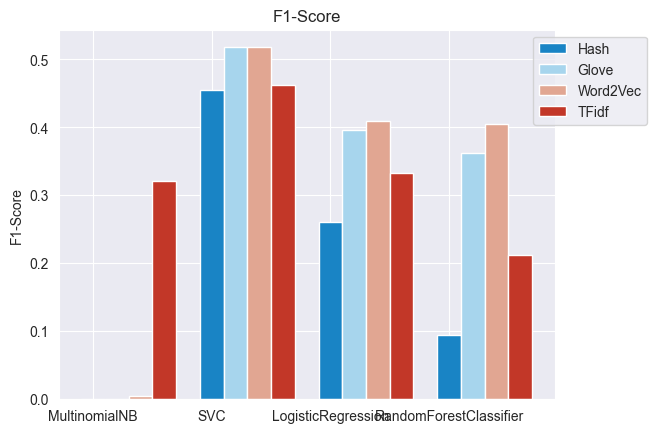

In [6]:
# create a dictionary to store the fa score values
f1_score_dict = {we: {m: 0 for m in models} for we in word_embeddings}

for _, row in df.iterrows():
    f1_score_dict[row['WordEmbedding']][row['Model']] = row['F1-Score']

fig, ax = plt.subplots()

for i, we in enumerate(word_embeddings):
    f1_scores = [f1_score_dict[we][m] for m in models]
    ax.bar(x + i*width, f1_scores, width, label=we, color=colors[i])

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_title("F1-Score")
ax.set_ylabel("F1-Score")
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.show()

##### Read CSV with different random seeds

In [7]:
df99 = pd.read_csv('performance_290323_rs99.csv')
df42 = pd.read_csv('performance_290323_rs42.csv')
df7 = pd.read_csv('performance_300323_rs7.csv')
df123 = pd.read_csv('performance_300323_rs123.csv')
df = pd.concat([df99, df42, df7, df123])

##### mean and standard deviation

In [8]:
grouped_df = df.groupby(["Model", "WordEmbedding"])
df_model = grouped_df[["Precision", "Recall", "F1-Score"]].agg(["mean", "std"])
print(df_model)

                                     Precision              Recall            \
                                          mean       std      mean       std   
Model                  WordEmbedding                                           
LogisticRegression     Glove          0.740698  0.002853  0.271466  0.000755   
                       Hash           0.679508  0.005974  0.160864  0.001098   
                       TFidf          0.805189  0.013866  0.208082  0.008195   
                       Word2Vec       0.758110       NaN  0.280295       NaN   
MultinomialNB          Glove          0.000000  0.000000  0.000000  0.000000   
                       Hash           0.000000  0.000000  0.000000  0.000000   
                       TFidf          0.825822  0.013552  0.195538  0.007130   
                       Word2Vec       0.872727       NaN  0.002285       NaN   
RandomForestClassifier Glove          0.740897  0.001629  0.240243  0.002870   
                       Hash           0.

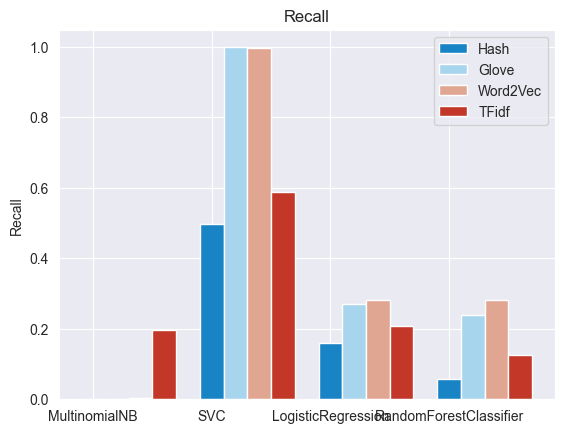

In [9]:
# group by model and word embedding and calculate the mean of recall
mean_recall = df.groupby(['Model', 'WordEmbedding']).mean()['Recall']

# extract the unique values of 'WordEmbedding' and 'Model'
word_embeddings = df['WordEmbedding'].unique()
models = df['Model'].unique()

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots()

for i, we in enumerate(word_embeddings):
    recalls = [mean_recall[m][we] for m in models]
    ax.bar(x + i*width, recalls, width, label=we, color=colors[i])

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_title("Recall")
ax.set_ylabel("Recall")
ax.legend()

plt.show()

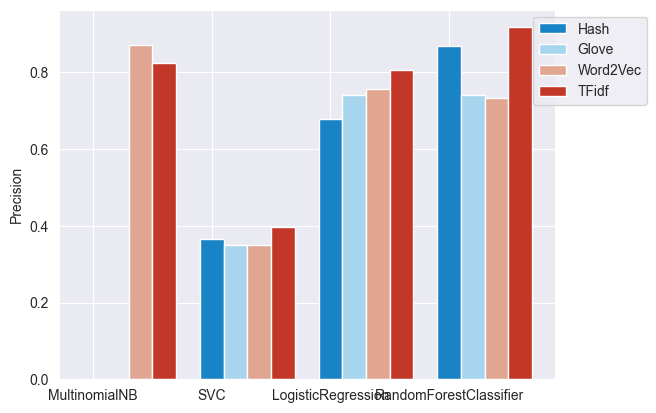

In [10]:
# group by model and word embedding and calculate the mean of precision
mean_precision = df.groupby(['Model', 'WordEmbedding']).mean()['Precision']

fig, ax = plt.subplots()

for i, we in enumerate(word_embeddings):
    precisions = [mean_precision[m][we] for m in models]
    ax.bar(x + i*width, precisions, width, label=we, color=colors[i])

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylabel("Precision")
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.show()